In [1]:
import pandas as pd
import numpy as np

import nltk
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer
from nltk.text import sent_tokenize
from nltk.tokenize import word_tokenize

import re
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import gensim
from gensim.models import Word2Vec
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from sklearn.metrics.pairwise import cosine_similarity
from tabulate import tabulate

In [2]:
data = pd.read_csv('talent.csv')
data

,id,job_title,location,connection,fit
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN
...,...,...,...,...,...
99,100,Aspiring Human Resources Manager | Graduating ...,"Cape Girardeau, Missouri",103,NaN
100,101,Human Resources Generalist at Loparex,"Raleigh-Durham, North Carolina Area",500+,NaN
101,102,Business Intelligence and Analytics at Travelers,Greater New York City Area,49,NaN
102,103,Always set them up for Success,Greater Los Angeles Area,500+,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          104 non-null    int64  
 1   job_title   104 non-null    object 
 2   location    104 non-null    object 
 3   connection  104 non-null    object 
 4   fit         0 non-null      float64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.2+ KB


In [4]:
data

,id,job_title,location,connection,fit
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN
...,...,...,...,...,...
99,100,Aspiring Human Resources Manager | Graduating ...,"Cape Girardeau, Missouri",103,NaN
100,101,Human Resources Generalist at Loparex,"Raleigh-Durham, North Carolina Area",500+,NaN
101,102,Business Intelligence and Analytics at Travelers,Greater New York City Area,49,NaN
102,103,Always set them up for Success,Greater Los Angeles Area,500+,NaN


In [5]:
data.location.unique()

array(['Houston, Texas', 'Kanada', 'Raleigh-Durham, North Carolina Area',
       'Denton, Texas', 'İzmir, Türkiye', 'Greater New York City Area',
       'San Francisco Bay Area', 'Greater Philadelphia Area',
       'Lake Forest, California', 'Houston, Texas Area',
       'Atlanta, Georgia', 'Chicago, Illinois', 'Austin, Texas Area',
       'Jackson, Mississippi Area', 'Greater Grand Rapids, Michigan Area',
       'Virginia Beach, Virginia', 'Monroe, Louisiana Area',
       'Greater Boston Area', 'San Jose, California',
       'New York, New York', 'Dallas/Fort Worth Area',
       'Amerika Birleşik Devletleri', 'Baton Rouge, Louisiana Area',
       'Myrtle Beach, South Carolina Area', 'Chattanooga, Tennessee Area',
       'Los Angeles, California', 'Highland, California',
       'Gaithersburg, Maryland', 'Baltimore, Maryland',
       'Milpitas, California', 'Greater Atlanta Area',
       'Greater Chicago Area', 'Torrance, California',
       'Long Beach, California', 'Bridgewater, Massa

In [6]:
# Extract job titles
job_titles = data['job_title'].dropna().astype(str)

# Use TF-IDF Vectorizer to analyze keywords
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
X = vectorizer.fit_transform(job_titles)

# Use KMeans clustering to find groups of similar job titles
num_clusters = 5  # Number of clusters to extract themes
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
kmeans.fit(X)

# Get top terms from each cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

# Extracting the most relevant keywords
top_keywords = set()
for i in range(num_clusters):
    top_keywords.update([terms[ind] for ind in order_centroids[i, :10]])

# Filtering only HR-related keywords (containing "HR" or "human resources")
hr_keywords = [kw for kw in top_keywords if "human resources" in kw.lower() or "hr" in kw.lower()]

# Filter job titles containing any of the HR-related keywords
data_filter = data[data['job_title'].str.contains('|'.join(hr_keywords), case=False, na=False)]

# Display the filtered results
print("Extracted HR Keywords:", hr_keywords)
print(data_filter)


Extracted HR Keywords: ['human resources', 'hr', 'hr senior']
      id                                          job_title  \
0      1  2019 C.T. Bauer College of Business Graduate (...   
2      3              Aspiring Human Resources Professional   
5      6                Aspiring Human Resources Specialist   
6      7  Student at Humber College and Aspiring Human R...   
7      8                               HR Senior Specialist   
..   ...                                                ...   
88    89                    Director Human Resources  at EY   
96    97              Aspiring Human Resources Professional   
98    99                   Seeking Human Resources Position   
99   100  Aspiring Human Resources Manager | Graduating ...   
100  101              Human Resources Generalist at Loparex   

                                location connection  fit  
0                         Houston, Texas         85  NaN  
2    Raleigh-Durham, North Carolina Area         44  NaN  
5   

In the above cell we can see the extracted HR keywords are "hr" and "hris", so below we are keeping this two keywords and processing forward with the model training and finding the best fit.

In the below cell we are removing unnecessary words and fixing spelling and language check and format of the words.

In [7]:
def text_cleaning(location):
#contains unnecessary words like 'Area', 'City' and 'Greater, removing them
    location= re.sub("Area","",location)
    location= re.sub("Greater","",location)
    location= re.sub("City","",location)

#fixing spelling and language check
    location = re.sub("Kanada","Canada",location)
    location = re.sub("Amerika Birleşik Devletleri","United States of America",location)
    location = re.sub("İzmir, Türkiye","izmir, Turkey",location)

  #fixing format
    location = re.sub("Dallas/Fort Worth","Dallas, Fort Worth",location)
    location = re.sub("New York, New York","New York",location)

  #fixing whitespace at start and end of names
    location = re.sub("^\s+|\s+$","",location)

    location = location.lower()

    return location

data.location = data.location.apply(lambda x: text_cleaning(x))
data.location.unique()

array(['houston, texas', 'canada', 'raleigh-durham, north carolina',
       'denton, texas', 'izmir, turkey', 'new york', 'san francisco bay',
       'philadelphia', 'lake forest, california', 'atlanta, georgia',
       'chicago, illinois', 'austin, texas', 'jackson, mississippi',
       'grand rapids, michigan', 'virginia beach, virginia',
       'monroe, louisiana', 'boston', 'san jose, california',
       'dallas, fort worth', 'united states of america',
       'baton rouge, louisiana', 'myrtle beach, south carolina',
       'chattanooga, tennessee', 'los angeles, california',
       'highland, california', 'gaithersburg, maryland',
       'baltimore, maryland', 'milpitas, california', 'atlanta',
       'chicago', 'torrance, california', 'long beach, california',
       'bridgewater, massachusetts', 'lafayette, indiana',
       'kokomo, indiana', 'las vegas, nevada', 'cape girardeau, missouri',
       'los angeles', 'katy, texas'], dtype=object)

In [11]:
lemmatizer = WordNetLemmatizer()

def text_process(text):
    #Filtering out the non-alphabets
    text = re.sub(r"[^a-zA-z\'\s]","",text)

  #converted all text to lowercase for consistency
    text = text.lower()

  #Spell check, form check etc
    text = re.sub("hr","human resources",text)
    text = re.sub("hris","human resource information system",text)
    text = re.sub("CHRO", "chief human resource officer",text)
    text = re.sub("SPHR","senior professional in human resources",text)
    


    words = nltk.word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords.words('english')]
    cleaned_text = ' '.join(lemmatized_words)
    
    return cleaned_text


data["job_title"] = data.job_title.apply(lambda x: text_process(x))

In [12]:
#Frequency count of words

def freq(text):
    word_list = []

    for word in text.str.split():
        word_list.extend(word)
        freq_word = pd.Series(word_list).value_counts()

    return freq_word

word_freq = freq(data.job_title)


print(word_freq[:10])

resource        77
human           73
aspiring        35
professional    21
student         16
seeking         15
generalist      14
college         14
university      12
specialist      12
dtype: int64


In the above cell you can clearly see teh frequency of word that how many times that word is repeating in the job_title column, and below is the word cloud visualization.   

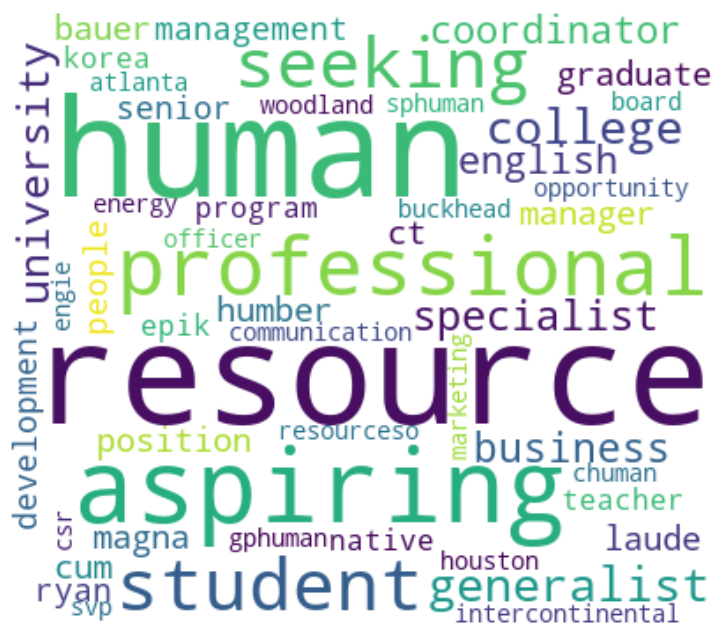

In [13]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc =  WordCloud(width = 400, height = 350, max_words= 50, background_color= 'white').generate_from_frequencies(word_freq)
plt.figure(figsize =(12,8))
plt.imshow(wc,interpolation = 'bilinear')
plt.axis('off')
plt.show()

According to our problem statement we need to find the best fit keeping this two keywords.

In [14]:
keywords = ["aspiring human resources", "seeking human resources"]

In [18]:
data['job_title'] = data['job_title'].astype(str)
cv = CountVectorizer(ngram_range=(1, 2), max_features=10)

X = cv.fit_transform(data['job_title'])
keywords = cv.get_feature_names_out()

keywords_string = " ".join(keywords)  
keyword_vector = cv.transform([keywords_string]) 

similarity_scores = cosine_similarity(keyword_vector, X)
data['fit_BOW'] = similarity_scores.max(axis=0)



In [19]:
data['job_title'] = data['job_title'].astype(str)
tiv = TfidfVectorizer(ngram_range=(1,2),max_features = 10)
X = tiv.fit_transform(data.job_title)

keywords = cv.get_feature_names_out()
keywords_string = " ".join(keywords)  
keyword_vector = tiv.transform([keywords_string])

similarity_scores = cosine_similarity(keyword_vector, X)

# Store the highest similarity score for each job title
data['fit_TFIDF'] = similarity_scores.max(axis=0)

In [20]:
vocab = [text.split() for text in data['job_title'].astype(str)]  # Ensure job titles are strings

# Training Word2Vec model using the vocabulary
w2v = Word2Vec(sentences=vocab, vector_size=100, window=3, min_count=3, workers=4)

# Convert extracted keywords list into a single string for tokenization
keywords_string = " ".join(keywords)  # Ensure `keywords` is a string
tokenized_keywords = word_tokenize(keywords_string)  # Tokenizing the combined keyword string

# Getting vectors for keywords (only if they exist in the Word2Vec vocabulary)
keyword_vectors = [
    w2v.wv[word] for word in tokenized_keywords if word in w2v.wv.index_to_key
]

# Handle empty keyword vectors case
if keyword_vectors:
    keyword_vectors = np.mean(keyword_vectors, axis=0).reshape(1, -1)
else:
    keyword_vectors = np.zeros((1, w2v.vector_size))  # Create a zero vector if no match

# Function to compute average Word2Vec vector for each job title
def avg_word2vec(text):
    words = [word for word in text.split() if word in w2v.wv.index_to_key]
    if not words:
        return np.zeros(w2v.vector_size)
    return np.mean([w2v.wv[word] for word in words], axis=0)

# Compute Word2Vec vectors for all job titles
X = np.array([avg_word2vec(text) for text in data['job_title']])

# Compute cosine similarity between keyword vector and job title vectors
similarity_scores = cosine_similarity(keyword_vectors, X)

# Store the highest similarity score for each job title
data['fit_Word2Vec'] = similarity_scores.max(axis=0)

In [21]:
scaler = StandardScaler()
#removed the +symbol from the connection and changed the dtype to int
data["connection"] = data["connection"].str.replace("+","",regex = True).astype('float')
data[["connection_scaled"]] = scaler.fit_transform(data[["connection"]])

In the below cell I have printed the output for the fit score calculated the connection scaled and more over asper your request I have printed the output of each individually (BOW, TF-IDF, Word2Vec) in their respective columns.  

In [24]:
data2 = data.copy()
#Using weighted sum to create a final fit score, taking into accout the connections of each candiatete

#data1['fit'] = 0.7*data1['fit_Word2Vec'] + 0.2*data1['connection_scaled'] + 0.1*data1['fit_TFIDF']
data2['fit'] = (
    0.8 * data2['fit_Word2Vec'] +
    0.15 * data2[['fit_BOW','connection_scaled']].mean(axis=1) +
    0.05 * data2['fit_TFIDF']
)

data2 = data2.sort_values(by='fit', ascending=False)

#Threshold - Filtering  non matching candiatates (BONUS requirement)
data2 = data2[(data2["fit_Word2Vec"] >= 0.30) & (data2["fit"] > 0.05)]

data2

,id,job_title,location,connection,fit,fit_BOW,fit_TFIDF,fit_Word2Vec,connection_scaled
66,67,human resource staffing recruiting professional,"jackson, mississippi",500.0,0.840310,0.760639,0.648087,0.838133,1.071352
75,76,aspiring human resource professional passionat...,new york,212.0,0.837779,0.894427,0.864381,0.930788,-0.228698
74,75,nortia staffing seeking human resource payroll...,"san jose, california",500.0,0.835472,0.755929,0.657367,0.831947,1.071352
81,82,aspiring human resource professional energetic...,"austin, texas",174.0,0.824914,0.894427,0.864381,0.930788,-0.400232
96,97,aspiring human resource professional,"kokomo, indiana",71.0,0.790043,0.894427,0.864381,0.930788,-0.865181
...,...,...,...,...,...,...,...,...,...
60,61,human resource senior specialist,san francisco bay,500.0,0.518335,0.683130,0.482335,0.453290,1.071352
7,8,human resource senior specialist,san francisco bay,500.0,0.518335,0.683130,0.482335,0.453290,1.071352
50,51,human resource senior specialist,san francisco bay,500.0,0.518335,0.683130,0.482335,0.453290,1.071352
71,72,business management major aspiring human resou...,"monroe, louisiana",5.0,0.486862,0.755929,0.595739,0.609517,-1.163109


/var/folders/w6/h71jw7yd5hj7f7_1r5971f440000gn/T/ipykernel_8083/3132047988.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels, rotation=45)


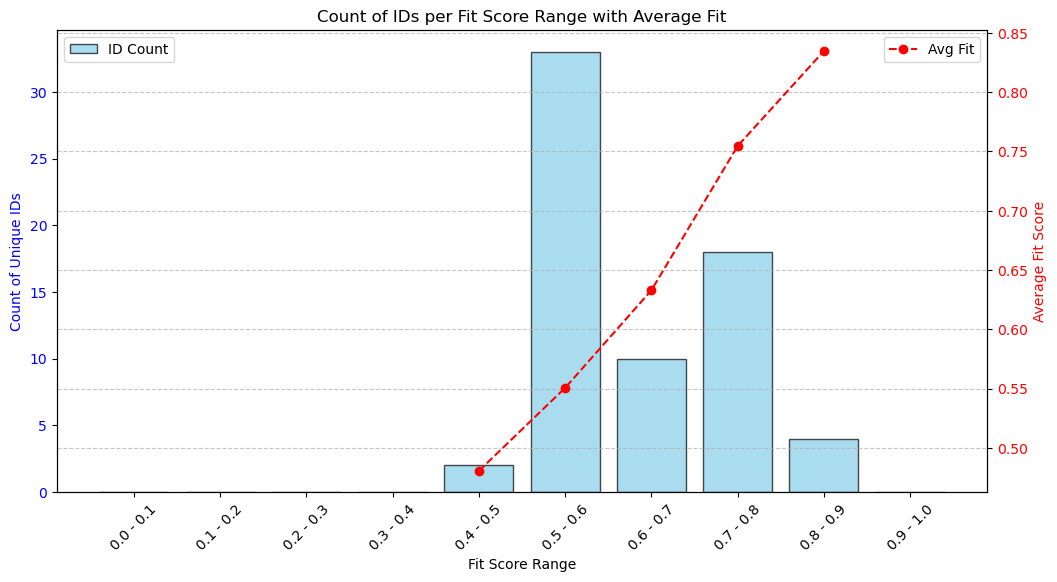

In [29]:
# Define bins for grouping fit values (ranges from 0.0 to 1.0 with 0.1 increments)
bins = np.arange(0, 1.1, 0.1)
labels = [f"{round(bins[i], 1)} - {round(bins[i+1], 1)}" for i in range(len(bins)-1)]

# Create a new column for the fit range categories
data2["fit_group"] = pd.cut(data2["fit"], bins=bins, labels=labels, include_lowest=True)

# Group by the fit range and count unique IDs
fit_grouped = data2.groupby("fit_group")["id"].count().reset_index()
fit_grouped.columns = ["fit_group", "id_count"]

# Compute the average fit per group
fit_avg = data2.groupby("fit_group")["fit"].mean().reset_index()
fit_avg.columns = ["fit_group", "avg_fit"]

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for ID count
ax1.bar(fit_grouped["fit_group"], fit_grouped["id_count"], color='skyblue', alpha=0.7, edgecolor='black', label="ID Count")
ax1.set_xlabel("Fit Score Range")
ax1.set_ylabel("Count of Unique IDs", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_xticklabels(labels, rotation=45)

# Create second y-axis for average fit line graph
ax2 = ax1.twinx()
ax2.plot(fit_avg["fit_group"], fit_avg["avg_fit"], color="red", marker="o", linestyle="--", label="Avg Fit")
ax2.set_ylabel("Average Fit Score", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Title and legend
plt.title("Count of IDs per Fit Score Range with Average Fit")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


/var/folders/w6/h71jw7yd5hj7f7_1r5971f440000gn/T/ipykernel_8083/248315617.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels, rotation=45)


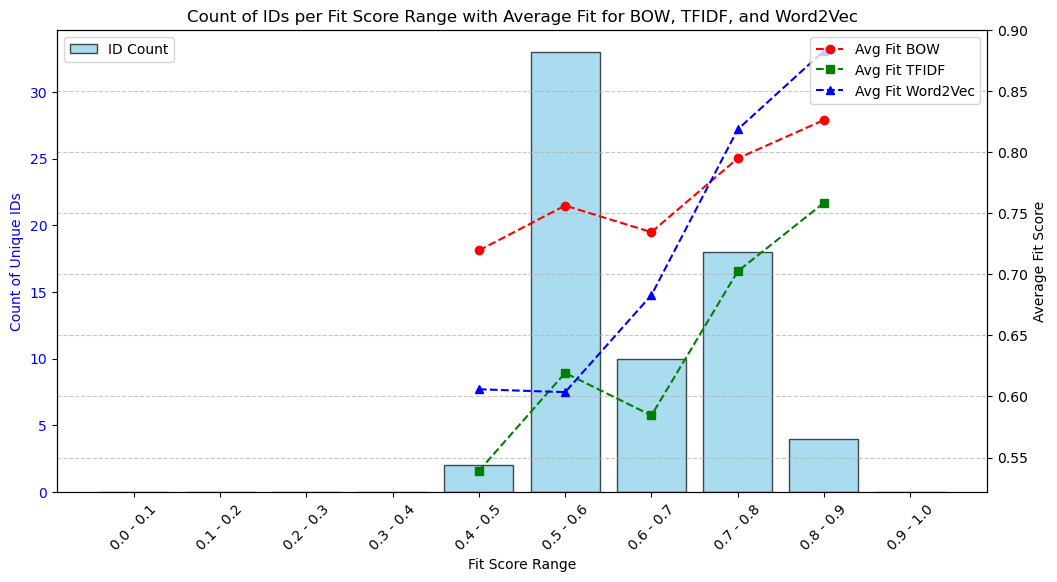

In [32]:

# Compute the average fit per group for BOW, TFIDF, and Word2Vec
fit_avg_bow = data2.groupby("fit_group")["fit_BOW"].mean().reset_index()
fit_avg_tfidf = data2.groupby("fit_group")["fit_TFIDF"].mean().reset_index()
fit_avg_word2vec = data2.groupby("fit_group")["fit_Word2Vec"].mean().reset_index()

# Plot bar graph
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for ID count
ax1.bar(fit_grouped["fit_group"], fit_grouped["id_count"], color='skyblue', alpha=0.7, edgecolor='black', label="ID Count")
ax1.set_xlabel("Fit Score Range")
ax1.set_ylabel("Count of Unique IDs", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_xticklabels(labels, rotation=45)

# Create second y-axis for multiple line graphs
ax2 = ax1.twinx()
ax2.plot(fit_avg_bow["fit_group"], fit_avg_bow["fit_BOW"], color="red", marker="o", linestyle="--", label="Avg Fit BOW")
ax2.plot(fit_avg_tfidf["fit_group"], fit_avg_tfidf["fit_TFIDF"], color="green", marker="s", linestyle="--", label="Avg Fit TFIDF")
ax2.plot(fit_avg_word2vec["fit_group"], fit_avg_word2vec["fit_Word2Vec"], color="blue", marker="^", linestyle="--", label="Avg Fit Word2Vec")

ax2.set_ylabel("Average Fit Score", color="black")
ax2.tick_params(axis="y", labelcolor="black")

# Title and legend
plt.title("Count of IDs per Fit Score Range with Average Fit for BOW, TFIDF, and Word2Vec")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


Word2Vec's word embeddings provided a better fit score by encoding semantic similarity between the keywords and job titles. By this we can see limitations of BOW/TF-IDF models. That is the main reason I have taken 0.8(80%) of fit_Word2Vec column in final fit score.

In the below cell I have tackled the 2nd problem statement, I have given the freedom to the user to select the random job id which he wants to make as a starred and derive the next fit score for the other candidates. 
As I have executed the cell and in first attempt I have entered an invalid id, and after that a valid id to show all the outputs. 

In [27]:
# Function to re-rank candidates using Word2Vec similarity
def rerank(df, starred_id):
    df.reset_index(drop=True, inplace=True)
    
    # Find the index of the selected candidate
    idx_list = df.index[df['id'] == starred_id].tolist()
    
    if not idx_list:
        print("INVALID ID! No matching candidate found.")
        return df
    
    idx = idx_list[0]

    df[['fit']] = df[['fit']].astype(str)
    starred_text = df.iloc[idx][['job_title', 'location', 'fit']].str.cat(sep=' ')

    starred_embed = avg_word2vec(starred_text).reshape(1, -1)
    texts = (df['job_title'] + ' ' + df['location'] + ' ' + df['fit']).astype(str)
    candidate_embeds = np.array([avg_word2vec(text) for text in texts])
    df['rerank_fit'] = cosine_similarity(starred_embed, candidate_embeds).reshape(-1, 1)

    return df.sort_values(by='rerank_fit', ascending=False)

print("RERANKING")

while True:
    try:
        starred_id = int(input("Enter the selected candidate ID: "))
        if starred_id in data['id'].values:
            data = rerank(data, starred_id)  # Apply re-ranking
            print(tabulate(
                data.head(10)[["id", "connection", "fit_Word2Vec", "rerank_fit"]], 
                headers="keys", 
                tablefmt="pipe"
            ))
            break
        else:
            print("INVALID ID! Enter a valid Candidate ID range.")
    except ValueError:
        print("INVALID INPUT! Please enter a valid integer from the Candidate ID range.")


RERANKING
Enter the selected candidate ID: 66
|    |   id |   connection |   fit_Word2Vec |   rerank_fit |
|---:|-----:|-------------:|---------------:|-------------:|
| 65 |   66 |           57 |       0.820037 |     1        |
| 20 |   21 |           44 |       0.930788 |     0.896463 |
| 81 |   82 |          174 |       0.930788 |     0.896463 |
| 32 |   33 |           44 |       0.930788 |     0.896463 |
| 57 |   58 |           44 |       0.930788 |     0.896463 |
| 16 |   17 |           44 |       0.930788 |     0.896463 |
| 75 |   76 |          212 |       0.930788 |     0.896463 |
| 45 |   46 |           44 |       0.930788 |     0.896463 |
|  2 |    3 |           44 |       0.930788 |     0.896463 |
| 96 |   97 |           71 |       0.930788 |     0.896463 |


By feature engineering the fitness score of candidates through a weighted combination of semantics from titles and scaled communication (representing networking skills), we can rank candidates fairly.The threshold ensures that only relevant candidates are retained, allowing the algorithm to effectively refine the ranking further.